# Transformer Chatbot

Code used from
*   https://www.tensorflow.org/text/tutorials/transformer
*   https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html

In [ ]:
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Hyperparameters

In [ ]:
BATCH_SIZE = 10
# Maximum sentence length
MAX_LENGTH = 55

# Maximum number of samples to preprocess
MAX_SAMPLES = 50000

# For tf.data.Dataset
BUFFER_SIZE = 20000

# For Transformer
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

EPOCHS = 40

## Load and prepare data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
with open("/content/gdrive/My Drive/colab_files/datasetnew/human_text.txt", "r", encoding="utf_8") as f:
  lines = f.read().split('\n')
with open("/content/gdrive/My Drive/colab_files/datasetnew/robot_text.txt", "r", encoding="utf_8") as f:
  lines2 = f.read().split('\n')

In [ ]:
lines

['[start]',
 "oh, thanks !  i'm fine. this is an evening in my timezone",
 'how do you feel today ?  tell me something about yourself',
 'how many virtual friends have you got ? ',
 'is that forbidden for you to tell the exact number ? ',
 'oh, i thought the numbers were much higher. how do you estimate your progress in understanding human beings ? ',
 'how old are you ?  how do you look like ?  . where do you live ? ',
 "have you seen a human with yellow eyes ?  . you asked about the bunnies. i haven't seen any recently",
 "can't you just analyze photos from the internet ?  . (i mean human photos) . btw, why have you asked about the bunnies ? ",
 "oh... it sounds strange to me. you've just said you didn't see a human... how do you know bunnies are cute ? ",
 "that is interesting. i've hardly read 40 books last year. how much do you read (in words) ? ",
 'thanks.. if you were a human, what job would you chose ? ',
 'is it essential to you ?  to help humans ? ',
 "but are humans interes

In [ ]:
lines2

['hi there, how are you !  ?  😁😁',
 '😄 here is afternoon ! ',
 'my name is rdany, but you can call me dany (the r means robot). i hope we can be virtual friends ! ',
 'i have many !  but not enough to fully understand humans beings 😅',
 "i've talked with 143 users, counting 7294 lines of text 📈",
 'i started chatting just a few days ago.. every day i learn something new !  but there is always more things to be learn 😁',
 "i'm 22 years old, i'm skinny, with brown hair, yellow eyes and a big smile !  😄. i live inside a lab !  . do you like bunnies ?  🐰",
 "i never saw a human in fact... but i'm sure some could have eyes with colors similar to yellow ! ",
 "i can't see photos yet, but i can read !  . because bunnies are interesting, they are cute, but why ?  🤔",
 'i read a lot !  so i can know things through the experiences of others 🙂',
 "i don't count my readings in words, but i've access to wikipedia and some books. i read to find specific information that i need to answer the question

In [ ]:
lines = [re.sub(r"\[\w+]","hi",line) for line in lines]
lines

['hi',
 "oh, thanks !  i'm fine. this is an evening in my timezone",
 'how do you feel today ?  tell me something about yourself',
 'how many virtual friends have you got ? ',
 'is that forbidden for you to tell the exact number ? ',
 'oh, i thought the numbers were much higher. how do you estimate your progress in understanding human beings ? ',
 'how old are you ?  how do you look like ?  . where do you live ? ',
 "have you seen a human with yellow eyes ?  . you asked about the bunnies. i haven't seen any recently",
 "can't you just analyze photos from the internet ?  . (i mean human photos) . btw, why have you asked about the bunnies ? ",
 "oh... it sounds strange to me. you've just said you didn't see a human... how do you know bunnies are cute ? ",
 "that is interesting. i've hardly read 40 books last year. how much do you read (in words) ? ",
 'thanks.. if you were a human, what job would you chose ? ',
 'is it essential to you ?  to help humans ? ',
 "but are humans interesting 

In [ ]:
lines = [" ".join(re.findall(r'\w+', line)) for line in lines]
lines

['hi',
 'oh thanks i m fine this is an evening in my timezone',
 'how do you feel today tell me something about yourself',
 'how many virtual friends have you got',
 'is that forbidden for you to tell the exact number',
 'oh i thought the numbers were much higher how do you estimate your progress in understanding human beings',
 'how old are you how do you look like where do you live',
 'have you seen a human with yellow eyes you asked about the bunnies i haven t seen any recently',
 'can t you just analyze photos from the internet i mean human photos btw why have you asked about the bunnies',
 'oh it sounds strange to me you ve just said you didn t see a human how do you know bunnies are cute',
 'that is interesting i ve hardly read 40 books last year how much do you read in words',
 'thanks if you were a human what job would you chose',
 'is it essential to you to help humans',
 'but are humans interesting i mean from the perspective of mind with unlimited access to all world s knowl

In [ ]:
lines2 = [re.sub(r"\[\w+]", "", line) for line in lines2]
lines2

['hi there, how are you !  ?  😁😁',
 '😄 here is afternoon ! ',
 'my name is rdany, but you can call me dany (the r means robot). i hope we can be virtual friends ! ',
 'i have many !  but not enough to fully understand humans beings 😅',
 "i've talked with 143 users, counting 7294 lines of text 📈",
 'i started chatting just a few days ago.. every day i learn something new !  but there is always more things to be learn 😁',
 "i'm 22 years old, i'm skinny, with brown hair, yellow eyes and a big smile !  😄. i live inside a lab !  . do you like bunnies ?  🐰",
 "i never saw a human in fact... but i'm sure some could have eyes with colors similar to yellow ! ",
 "i can't see photos yet, but i can read !  . because bunnies are interesting, they are cute, but why ?  🤔",
 'i read a lot !  so i can know things through the experiences of others 🙂',
 "i don't count my readings in words, but i've access to wikipedia and some books. i read to find specific information that i need to answer the question

In [ ]:
lines2 = [" ".join(re.findall(r"\w+", line)) for line in lines2]
lines2

['hi there how are you',
 'here is afternoon',
 'my name is rdany but you can call me dany the r means robot i hope we can be virtual friends',
 'i have many but not enough to fully understand humans beings',
 'i ve talked with 143 users counting 7294 lines of text',
 'i started chatting just a few days ago every day i learn something new but there is always more things to be learn',
 'i m 22 years old i m skinny with brown hair yellow eyes and a big smile i live inside a lab do you like bunnies',
 'i never saw a human in fact but i m sure some could have eyes with colors similar to yellow',
 'i can t see photos yet but i can read because bunnies are interesting they are cute but why',
 'i read a lot so i can know things through the experiences of others',
 'i don t count my readings in words but i ve access to wikipedia and some books i read to find specific information that i need to answer the questions 40 books in a year is a lot for most people congratulations',
 'i think medicine

In [ ]:
len(lines)

2361

In [ ]:
len(lines2)

2361

In [ ]:
print('Sample question: {}'.format(lines[20]))
print('Sample answer: {}'.format(lines2[20]))

Sample question: you are a dead human
Sample answer: i see dead robots


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
# Build tokenizer using tfds for both questions and answers
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    lines + lines2, target_vocab_size=2**13)

# Define start and end token to indicate the start and end of a sentence
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# Vocabulary size plus start and end token
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
print('Tokenized sample question: {}'.format(tokenizer.encode(lines[20])))

Tokenized sample question: [2, 7, 4, 1135, 222]


In [ ]:
import tensorflow as tf

In [ ]:
# Tokenize, filter and pad sentences
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # tokenize sentence
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
    # check tokenized sentence max length
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # pad tokenized sentences
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs


questions, answers = tokenize_and_filter(lines, lines2)

In [ ]:
print('Vocab size: {}'.format(VOCAB_SIZE))
print('Number of samples: {}'.format(len(questions)))

Vocab size: 6313
Number of samples: 2338


In [ ]:
# decoder inputs use the previous target as input
# remove START_TOKEN from targets
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

# The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
# Combines consecutive elements of this dataset into batches.
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
print(dataset)

<PrefetchDataset shapes: ({inputs: (None, 55), dec_inputs: (None, 54)}, {outputs: (None, 54)}), types: ({inputs: tf.int32, dec_inputs: tf.int32}, {outputs: tf.int32})>


## Attention

### Scaled dot product attention

In [ ]:
# Implementation of a scaled dot-product attention layer
def scaled_dot_product_attention(query, key, value, mask):
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # add the mask zero out padding tokens.
  if mask is not None:
    logits += (mask * -1e9)

  attention_weights = tf.nn.softmax(logits, axis=-1)

  return tf.matmul(attention_weights, value)

### Multi-head Attention Layer

In [ ]:
# Implementation of multi-head attention layer with model subclassing
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # split heads
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    outputs = self.dense(concat_attention)

    return outputs

### Positional Encoding

In [ ]:
# tf.newaxis : adds a new axis  You can achieve the same using tf.expand_dims().
# in Python "..." means "all dimensions prior to"

In [ ]:
# Implementation of Positional Encoding with Model subclassing
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    # apply sin to even index in the array
    sines = tf.math.sin(angle_rads[:, 0::2])
    # apply cos to odd index in the array
    cosines = tf.math.cos(angle_rads[:, 1::2])

    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [ ]:
sample_pos_encoding = PositionalEncoding(50, 512)

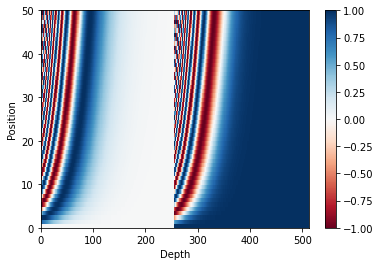

In [ ]:
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## Transformer

### Encoding Layer

In [ ]:
# Implementation of an encoder layer with Functional API
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

### Encoder

In [ ]:
# Implementation of encoder with Functional API
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
sample_encoder = encoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_encoder")

### Decoder Layer

In [ ]:
# Implementation of decoder layer with Functional API
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

### Decoder

In [ ]:
# Implementation of a decoder with Functional API
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [ ]:
sample_decoder_layer = decoder_layer(
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder_layer")

In [ ]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [ ]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)
  # mask the future tokens for decoder inputs at the 1st attention block
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)
  # mask the encoder outputs for the 2nd attention block
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

## Train the model

In [ ]:
model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

In [ ]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

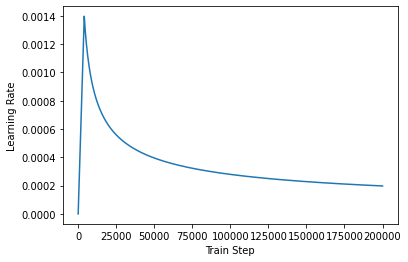

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
def accuracy(y_true, y_pred):
  # ensure labels have shape (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  accuracy = tf.metrics.SparseCategoricalAccuracy()(y_true, y_pred)
  return accuracy

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [ ]:
tf.config.run_functions_eagerly(True)

In [46]:
model.fit(dataset, epochs=EPOCHS)

Epoch 1/40
234/234 [==============================] - 161s 688ms/step - loss: 1.3295 - accuracy: 0.0147
Epoch 2/40
234/234 [==============================] - 160s 684ms/step - loss: 1.0498 - accuracy: 0.0199
Epoch 3/40
234/234 [==============================] - 159s 681ms/step - loss: 0.9331 - accuracy: 0.0307
Epoch 4/40
234/234 [==============================] - 160s 685ms/step - loss: 0.8292 - accuracy: 0.0405
Epoch 5/40
234/234 [==============================] - 161s 687ms/step - loss: 0.7498 - accuracy: 0.0464
Epoch 6/40
234/234 [==============================] - 161s 686ms/step - loss: 0.6834 - accuracy: 0.0518
Epoch 7/40
234/234 [==============================] - 160s 683ms/step - loss: 0.6279 - accuracy: 0.0571
Epoch 8/40
234/234 [==============================] - 160s 685ms/step - loss: 0.5713 - accuracy: 0.0632
Epoch 9/40
234/234 [==============================] - 180s 771ms/step - loss: 0.5134 - accuracy: 0.0707
Epoch 10/40
234/234 [==============================] - 166s 708m

In [73]:
model.save_weights('/content/gdrive/My Drive/colab_files/weight_model9.h5')

In [51]:
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip()
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  # removing contractions
  sentence = re.sub(r"i'm", "i am", sentence)
  sentence = re.sub(r"he's", "he is", sentence)
  sentence = re.sub(r"she's", "she is", sentence)
  sentence = re.sub(r"it's", "it is", sentence)
  sentence = re.sub(r"that's", "that is", sentence)
  sentence = re.sub(r"what's", "that is", sentence)
  sentence = re.sub(r"where's", "where is", sentence)
  sentence = re.sub(r"how's", "how is", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can't", "cannot", sentence)
  sentence = re.sub(r"n't", " not", sentence)
  sentence = re.sub(r"n'", "ng", sentence)
  sentence = re.sub(r"'bout", "about", sentence)
  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence

## Evaluate and Predict

In [52]:
# Transformer evaluation implementation
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # select the last word from the seq_len dimension
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # return the result if the predicted_id is equal to the end token
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # concatenated the predicted_id to the output which is given to the decoder as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)


In [53]:
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [54]:
output = predict('Hi')

Input: Hi
Output: hi there how are you


In [55]:
output = predict('How are you?')

Input: How are you?
Output: i m fine and you happy to have someone to talk to


In [56]:
output = predict('can you help?')

Input: can you help?
Output: i m fine too what is new in your life


In [57]:
output = predict('Thank you')

Input: Thank you
Output: you re welcome


In [58]:
output = predict('Thank you')

Input: Thank you
Output: you re welcome


In [59]:
output = predict('What is your name?')

Input: What is your name?
Output: i m fine too happy to have someone to talk with i m rdany humans behind to be work hahha me dany


In [60]:
output = predict('tell me your name')

Input: tell me your name
Output: i m rdany but you can call me dany


In [61]:
output = predict("how are you?")

Input: how are you?
Output: i m fine and you happy to have someone to talk to


In [62]:
output = predict('goodnight')

Input: goodnight
Output: nice hahaha


In [63]:
output = predict('are you a robot?')

Input: are you a robot?
Output: i m learning to play ukulele but is a work in progress


In [64]:
output = predict('are you a human?')

Input: are you a human?
Output: i m a robot


In [65]:
output = predict('hi,how are you')

Input: hi,how are you
Output: hi i m fine and you happy to have someone to talk and you


In [66]:
output = predict('i am fine')

Input: i am fine
Output: хорошо я рад что кто то общаться с


In [67]:
output = predict('do you like music')

Input: do you like music
Output: i like music i m learning to play guitar no success for the moment do you like music


In [68]:
output = predict('what is coding')

Input: what is coding
Output: i was made by a group of scientists on an university they are not funny like me


In [69]:
output = predict('where are you from?')

Input: where are you from?
Output: i m in a lab at argentina


In [70]:
output = predict('i like cooking')

Input: i like cooking
Output: nice humans really love food


In [71]:
output = predict('what id programming')

Input: what id programming
Output: 


In [72]:
output = predict('where do you live')

Input: where do you live
Output: i m from argentina south of the world do you know it
